In [1]:
import sys
import os

In [2]:
from vdyn.models.longitudinal_1d import Vehicle, accel_brake_run, to_kmh, time_to_speed, compute_kpis
import matplotlib.pyplot as plt
from vdyn.models.powertrain import Powertrain, Gearbox, TorqueCurve, default_highrev_curve
import numpy as np
import pandas as pd

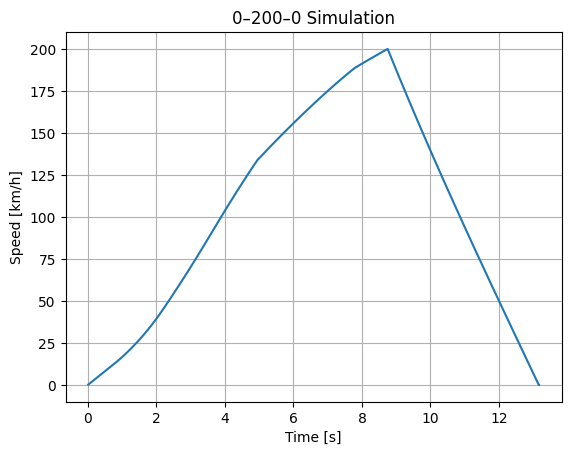

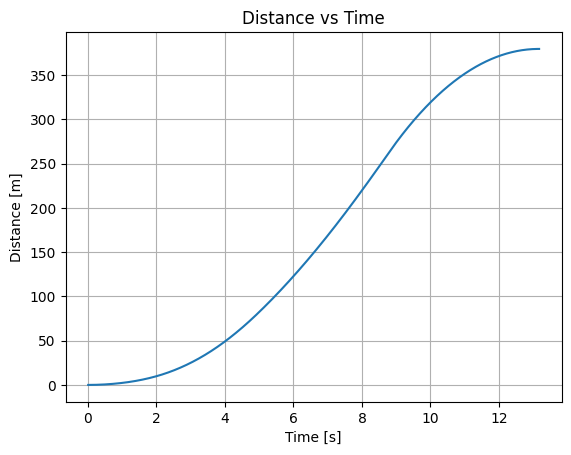

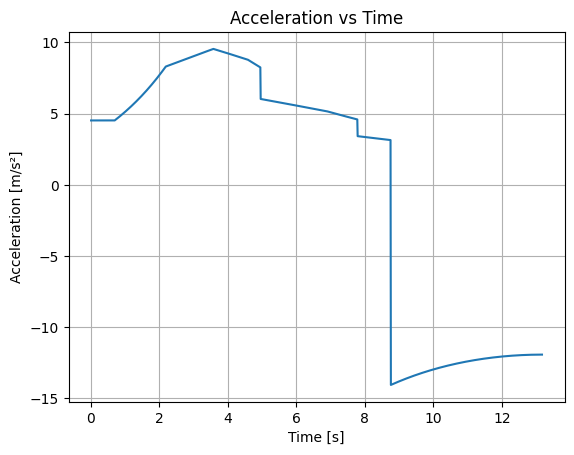

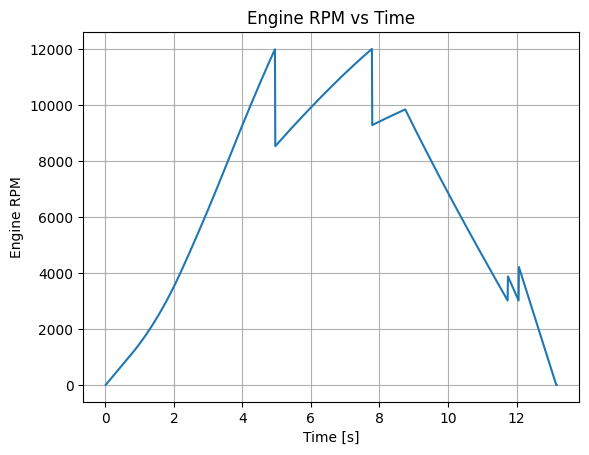

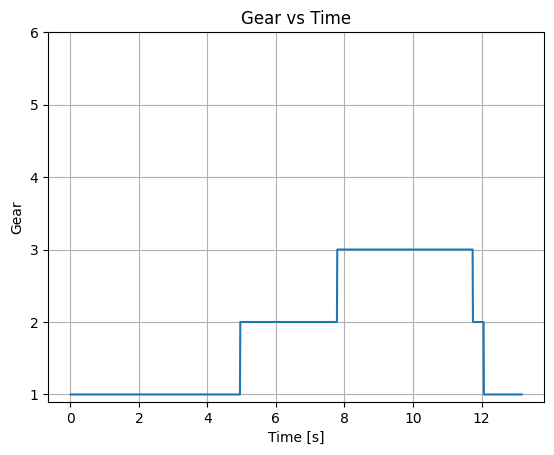

In [3]:
gbx = Gearbox(ratios=[3.10, 2.20, 1.70, 1.35, 1.12, 0.95], final_drive=3.6, wheel_radius_m=0.33)
pt = Powertrain(curve=default_highrev_curve(), box=gbx)

car = Vehicle()
T, V, S, A, G, R, = accel_brake_run(car, dt=0.01, powertrain = pt)


plt.figure()
plt.plot(T, to_kmh(V))
plt.xlabel("Time [s]")
plt.ylabel("Speed [km/h]")
plt.title("0–200–0 Simulation")
plt.grid(True);

plt.figure()
plt.plot(T, S)
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.title("Distance vs Time")
plt.grid(True);

plt.figure()
plt.plot(T, A)
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [m/s²]")
plt.title("Acceleration vs Time")
plt.grid(True);

plt.figure()
plt.plot(T, R)
plt.xlabel("Time [s]")
plt.ylabel("Engine RPM")
plt.title("Engine RPM vs Time")
plt.grid(True);
# plt.savefig("../docs/img/rpm_vs_time.png", dpi=160)

plt.figure()
plt.plot(T, G)
plt.xlabel("Time [s]")
plt.ylabel("Gear")
plt.title("Gear vs Time")
plt.grid(True)
plt.yticks(range(1, 7));
# plt.savefig("../docs/img/gear_vs_time.png", dpi=160)


In [4]:


car = Vehicle()
gbx_short = Gearbox([3.10,2.20,1.70,1.35,1.12,0.95], final_drive=3.8, wheel_radius_m=0.33,
                    driveline_eff=0.92, shift_rpm=12500, downshift_rpm=1500, launch_gear=1)
gbx_long  = Gearbox([3.10,2.20,1.70,1.35,1.12,0.95], final_drive=3.2, wheel_radius_m=0.33,
                    driveline_eff=0.92, shift_rpm=12500, downshift_rpm=1500, launch_gear=1)
pt_short = Powertrain(default_highrev_curve(), gbx_short)
pt_long  = Powertrain(default_highrev_curve(), gbx_long)

T1,V1,S1,A1,G1,R1 = accel_brake_run(car, dt=0.01, powertrain=pt_short)
T2,V2,S2,A2,G2,R2 = accel_brake_run(car, dt=0.01, powertrain=pt_long)

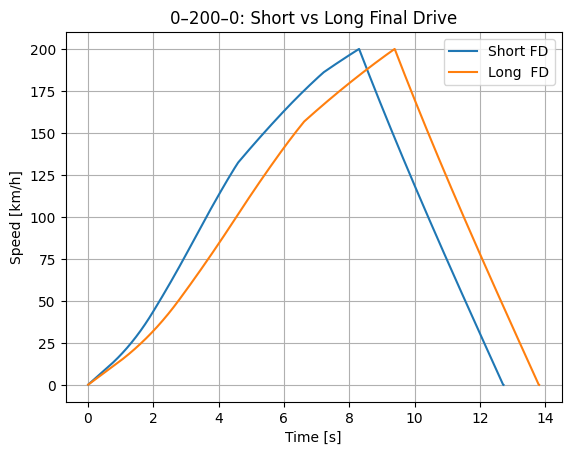

In [6]:
plt.figure()
plt.plot(T1, to_kmh(V1), label="Short FD")
plt.plot(T2, to_kmh(V2), label="Long  FD")
plt.xlabel("Time [s]")
plt.ylabel("Speed [km/h]")
plt.title("0–200–0: Short vs Long Final Drive")
plt.grid(True)
plt.legend();

k_short = compute_kpis(T1, V1, S1) | {"setup": "Short FD"}
k_long  = compute_kpis(T2, V2, S2) | {"setup": "Long  FD"}
dataframe = pd.DataFrame([k_short, k_long])[["setup","t_0_100_s","t_0_200_s","vmax_kmh","brake_100_0_m"]]
dataframe
dataframe.to_csv("../data/fd_kpis.csv", index=False)